In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.fftpack import dct, idct
from jpeg import JPEG

Q_100 = [np.ones((8, 8)), np.ones((8, 8)), np.ones((8, 8))]
Q_X = [2*np.ones((8, 8)), 2*np.ones((8, 8)), 2*np.ones((8, 8))]

w, h = 64*8+2, 64*8+2

arr_spatial_raw = np.ones((w, h))*2**7

# Generate heteroscedastic noise
a, b = 10**(-3), 2
arr_spatial_raw = np.random.normal(arr_spatial_raw, a*arr_spatial_raw+b)


# Handle clipping
arr_spatial_raw[arr_spatial_raw<0] = 0
arr_spatial_raw[arr_spatial_raw>(2**8)-1] = (2**8)-1

# Mimick bayer demosaicking
arr_spatial_R, arr_spatial_G, arr_spatial_B = np.array([[0, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 0]])
arr_spatial_R, arr_spatial_G, arr_spatial_B = [ arr_spatial_raw*np.kron(np.ones((w//2, h//2)), m) for m in [arr_spatial_R, arr_spatial_G, arr_spatial_B]]

K_R, K_G, K_B = (1/4)*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), \
                (1/4)*np.array([[0, 1, 0], [1, 4, 1], [0, 1, 0]]), \
                (1/4)*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

arr_spatial_RGB = np.dstack((scipy.signal.convolve2d(arr_spatial_R, K_R, 'valid'), \
                             scipy.signal.convolve2d(arr_spatial_G, K_G, 'valid'), \
                             scipy.signal.convolve2d(arr_spatial_B, K_B, 'valid'))).astype(np.uint8)

jpeg_file_simple_compression = JPEG(arr_spatial_RGB).DCT()\
                                .Quantize(Q_100)\
                                .Z_Ordering()\
                                .output()

jpeg_file_double_compression = JPEG(arr_spatial_RGB)\
                                .DCT()\
                                .Quantize(Q_100)\
                                .Dequantize(Q_100)\
                                .IDCT()\
                                .DCT()\
                                .Quantize(Q_X)\
                                .Z_Ordering()\
                                .output()\

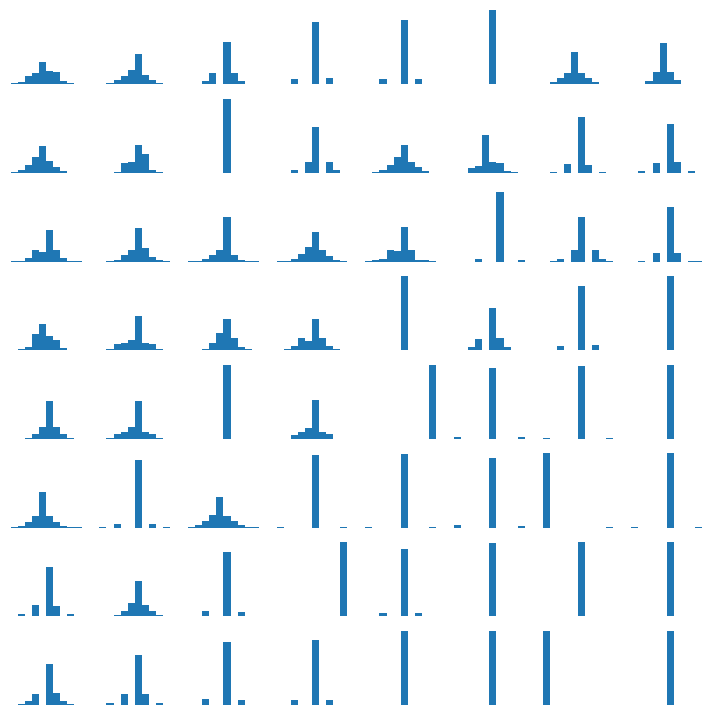

In [6]:
fig, axs = plt.subplots(figsize = (10, 10), nrows = 8, ncols = 8, sharey=True, tight_layout=True)
x = jpeg_file_simple_compression[0, :, 0]

for i in range(8**2):
    axs[i//8, i%8].hist(x[i::64])
    axs[i//8, i%8].axis('off')
plt.show()

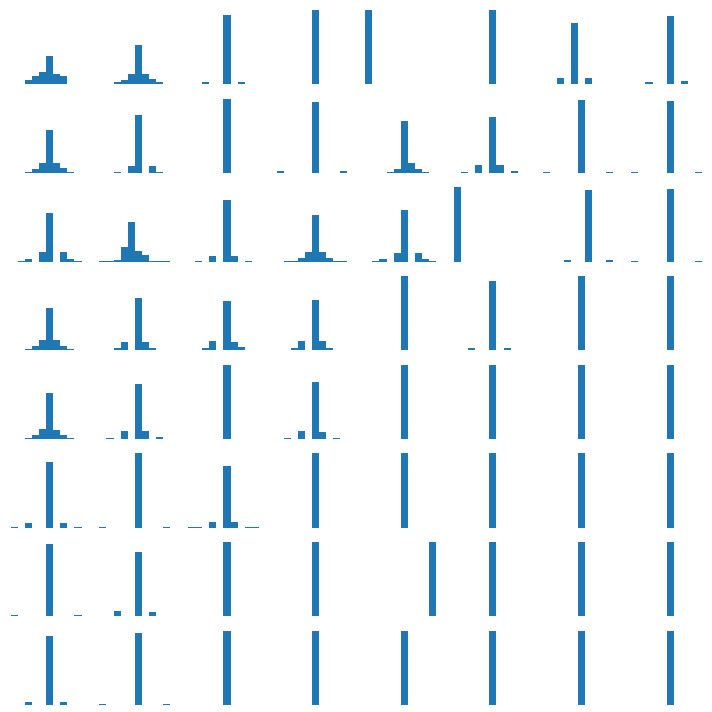

In [289]:
fig, axs = plt.subplots(figsize = (10, 10), nrows = 8, ncols = 8, sharey=True, tight_layout=True)
x = jpeg_file_double_compression[0, :, 0]

for i in range(8**2):
    axs[i//8, i%8].hist(x[i::64])
    axs[i//8, i%8].axis('off')
plt.show()